# The Spark Foundation - GRIP JULY 2021

## Task 6: Prediction using Decision Tree Algorithm
## (Level - Intermediate)
## Aurthor - Adarsh Kumar Nishad

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas 
import graphviz
import sklearn.datasets as datasets
from pandas.plotting import scatter_matrix  
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Load dataset

In [2]:
iris = datasets.load_iris()

In [3]:
dataframe=pd.DataFrame(iris.data, columns=iris.feature_names)
y= iris.target

In [4]:
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Exploratory Data Analysis

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
dataframe.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [9]:
dataframe.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

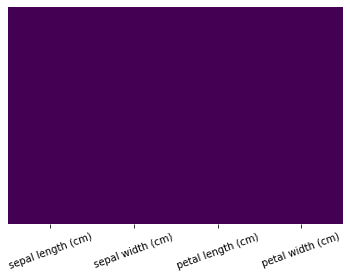

In [10]:
hp = sns.heatmap(dataframe.isnull() , yticklabels = False , cbar = False , cmap = 'viridis')
hp.set_xticklabels(hp.get_xticklabels() , rotation =20);

In [11]:
print('The Name of the features is: ')
for i in iris.feature_names:
    print(i)

The Name of the features is: 
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


In [12]:
print('The category of the target is: ')
for i in iris.target_names:
    print(i)

The category of the target is: 
setosa
versicolor
virginica


In [13]:
dataframe.groupby(iris.target).size()

0    50
1    50
2    50
dtype: int64

### Data Visualization

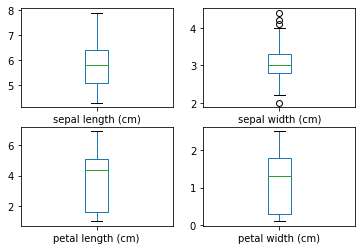

In [14]:
dataframe.plot(kind='box',subplots=True,layout=(2,2),sharex=False , sharey = False)
plt.show()

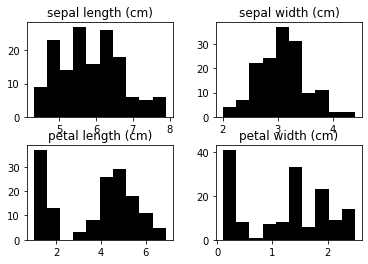

In [15]:
dataframe.hist(grid=False , color='black')
plt.show()

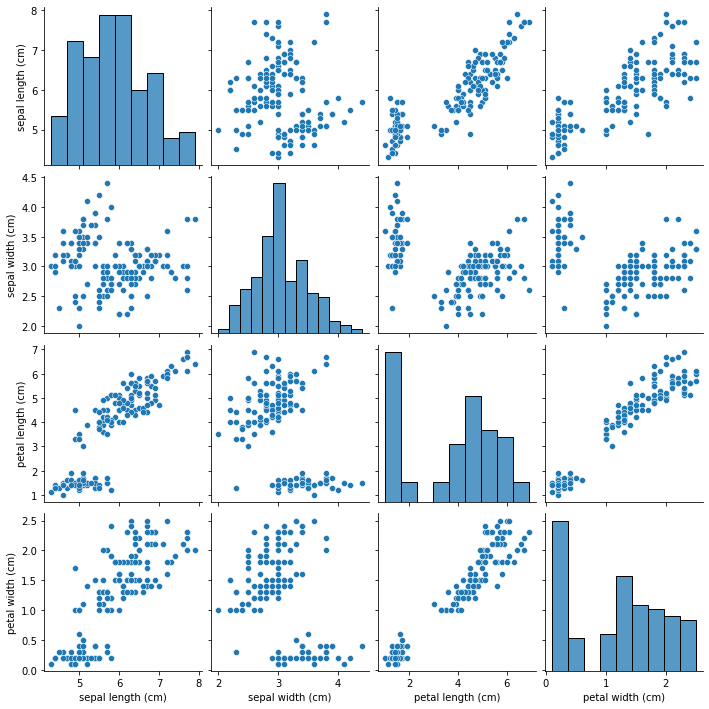

In [16]:
sns.pairplot(dataframe , kind ='scatter')

### Spliting the dataset in train and test

In [17]:
x_train , x_test , y_train , y_test = model_selection.train_test_split(dataframe , y , test_size=0.2 , random_state=0)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(120, 4)
(120,)
(30, 4)


### Decision Tree Algorithm

In [19]:
model = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)

In [20]:
model.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

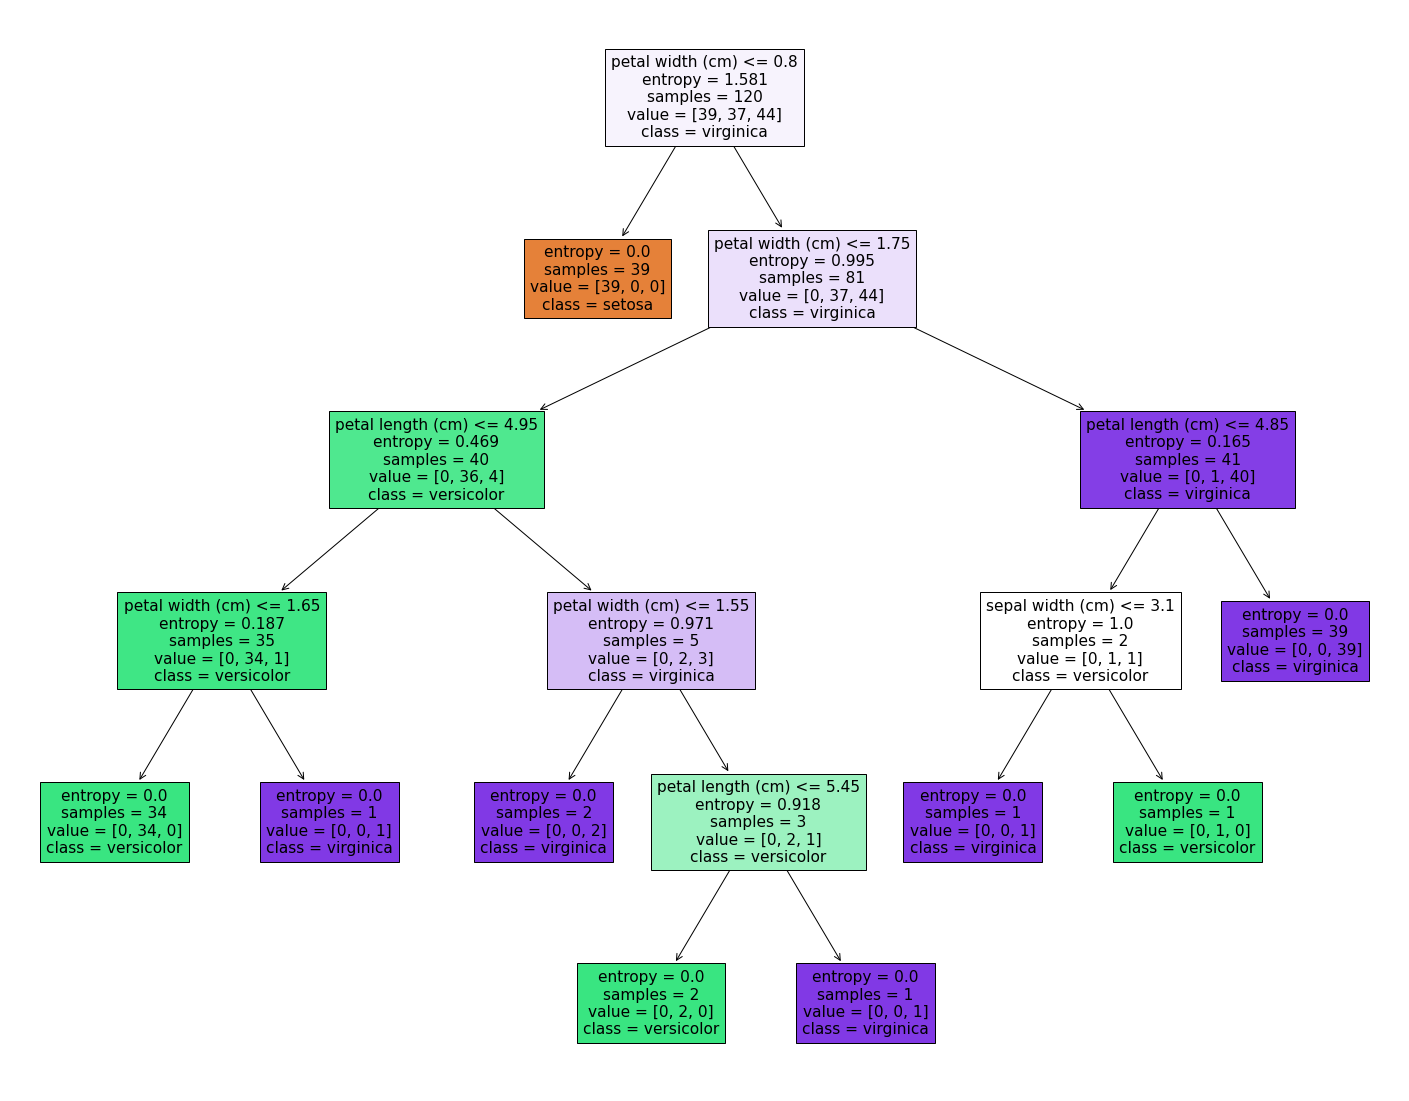

In [21]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

### Predict the model

In [22]:
y_pred = model.predict(x_test)

### Confusion Matrix

In [23]:
conf_matrix = confusion_matrix(y_test , y_pred)

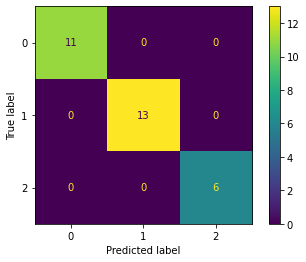

In [24]:
plot_confusion_matrix(model,x_test,y_test)

### Heatmap

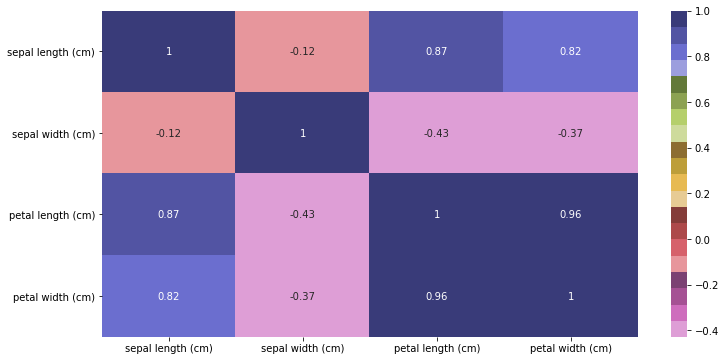

In [25]:
plt.figure(figsize=(12,6))
corr = dataframe.corr()
hp =sns.heatmap(corr, cmap = 'tab20b_r', annot= True )

### Classification report

In [26]:
classi_report = classification_report(y_test , y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Accuracy

In [27]:
acc = accuracy_score(y_test, y_pred)

In [28]:
print("The Accuracy of this mode",acc*100,"%.")

The Accuracy of this mode 100.0 %.
